In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [5]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [6]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

C:\Users\Owner\AppData\Local\Temp\ipykernel_8180\4196587217.py:4: SADeprecationWarning: The AutomapBase.prepare.reflect parameter is deprecated and will be removed in a future release.  Reflection is enabled when AutomapBase.prepare.autoload_with is passed.
  Base.prepare(engine, reflect=True)


In [13]:
# View all of the classes that automap found
print("Available tables:", Base.classes.keys())

Available tables: ['measurement', 'station']


In [14]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [15]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [16]:
# Find the most recent date in the data set.
recent_date = session.query(func.max(Measurement.date)).scalar()
print("Most recent date in the dataset:", recent_date)

Most recent date in the dataset: 2017-08-23


<Axes: title={'center': 'Precipitation Over the Last 12 Months'}, xlabel='date'>

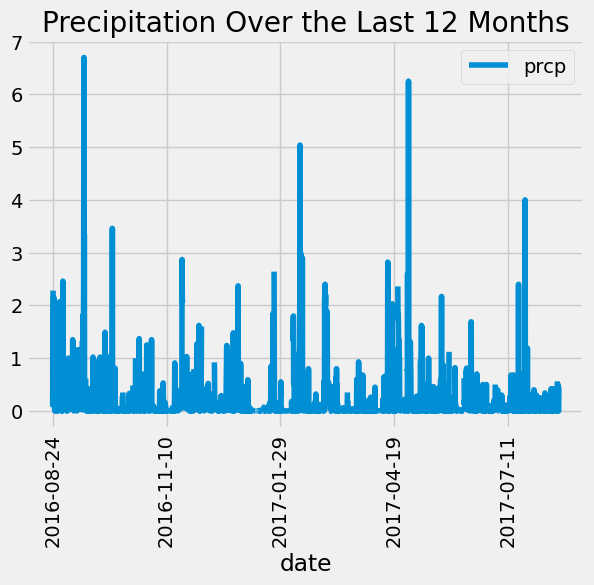

In [23]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.
recent_date_dt = dt.datetime.strptime(recent_date, '%Y-%m-%d')
one_year_ago = recent_date_dt - dt.timedelta(days=365)

# Perform a query to retrieve the data and precipitation scores
prcp_data = session.query(Measurement.date, Measurement.prcp).\
    filter(Measurement.date >= one_year_ago).\
    order_by(Measurement.date).all()

# Save the query results as a Pandas DataFrame. Explicitly set the column names
prcp_df = pd.DataFrame(prcp_data, columns=["date", "prcp"])

# Sort the dataframe by date
prcp_df = prcp_df.sort_values(by="date")

# Use Pandas Plotting with Matplotlib to plot the data

prcp_df.plot(x="date", y="prcp", title="Precipitation Over the Last 12 Months", rot=90)

In [26]:
# Use Pandas to calculate the summary statistics for the precipitation data
summary_stats =prcp_df.describe()
summary_stats

,prcp
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [30]:
# Design a query to calculate the total number of stations in the dataset
station_count = session.query(func.count(Station.station)).scalar()
print("Total number of stations:", station_count)

Total number of stations: 9


In [31]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
active_stations = session.query(Measurement.station, func.count(Measurement.station)).\
    group_by(Measurement.station).\
    order_by(func.count(Measurement.station).desc()).all()
print("Active stations and their counts:")
active_stations

Active stations and their counts:


[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [32]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
most_active_station = active_stations[0][0]
temp_stats = session.query(
    func.min(Measurement.tobs),
    func.avg(Measurement.tobs),
    func.max(Measurement.tobs)
).filter(Measurement.station == most_active_station).all()
print("Temperature stats for most active station:", temp_stats)

Temperature stats for most active station: [(54.0, 71.66378066378067, 85.0)]


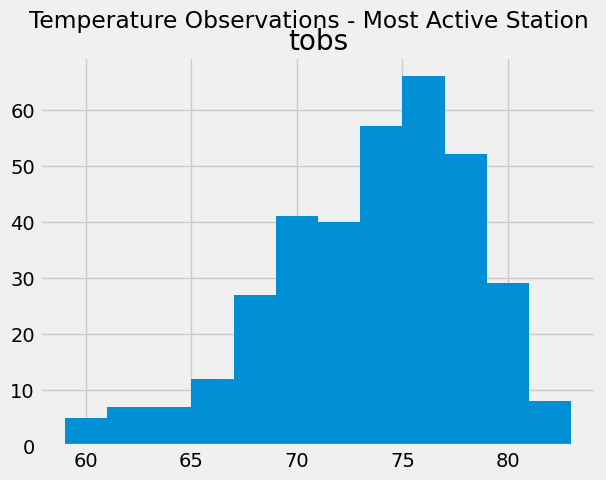

In [37]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
tobs_data = session.query(Measurement.tobs).\
    filter(Measurement.station == most_active_station).\
    filter(Measurement.date >= one_year_ago).all()

# Convert tobs data to a DataFrame for plotting
plot_df = pd.DataFrame(tobs_data, columns=["tobs"])
import matplotlib.pyplot as plt  # Ensure matplotlib is imported

# Plot the histogram
ax = plot_df.hist(bins=12)

# Set the title using matplotlib
plt.suptitle("Temperature Observations - Most Active Station")

# Show the plot
plt.show()

# Close Session

In [38]:
# Close Session
session.close()